In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib notebook

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [8]:
f = open('C:\\Users\\Think\\Desktop\\zhishu.csv')
df = pd.read_csv(f)
df = df['price_close']
dataset = df.values
dataset = dataset.astype('float32')
dataset = dataset[:,np.newaxis]

<IPython.core.display.Javascript object>


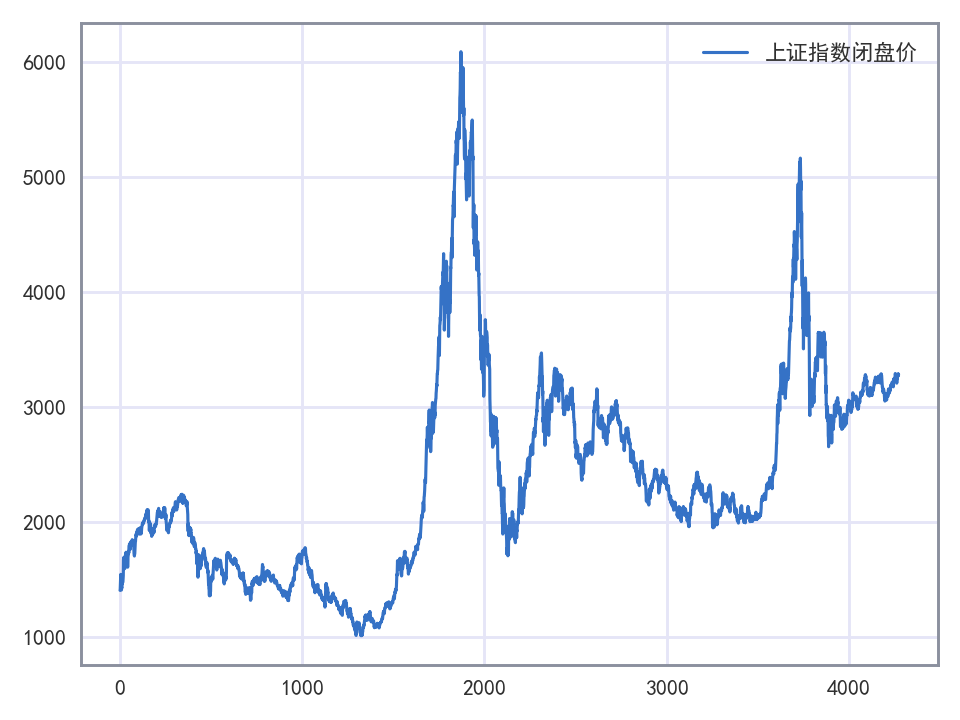

In [3]:
plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(dataset)
plt.legend(["上证指数闭盘价"], loc=1)
plt.show()

In [9]:
def create_dataset(dataset, look_back=10):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 20
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
trainX ,trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [sample, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM　network
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
3s - loss: 0.0357
Epoch 2/100
3s - loss: 0.0066
Epoch 3/100
3s - loss: 0.0017
Epoch 4/100
3s - loss: 0.0012
Epoch 5/100
3s - loss: 8.8660e-04
Epoch 6/100
3s - loss: 7.4703e-04
Epoch 7/100
3s - loss: 6.8921e-04
Epoch 8/100
3s - loss: 6.6330e-04
Epoch 9/100
3s - loss: 6.5216e-04
Epoch 10/100
3s - loss: 6.3851e-04
Epoch 11/100
3s - loss: 6.2865e-04
Epoch 12/100
4s - loss: 6.2037e-04
Epoch 13/100
3s - loss: 6.1255e-04
Epoch 14/100
3s - loss: 6.0349e-04
Epoch 15/100
3s - loss: 5.9729e-04
Epoch 16/100
3s - loss: 5.8927e-04
Epoch 17/100
3s - loss: 5.8346e-04
Epoch 18/100
3s - loss: 5.7460e-04
Epoch 19/100
3s - loss: 5.6876e-04
Epoch 20/100
3s - loss: 5.6127e-04
Epoch 21/100
3s - loss: 5.5806e-04
Epoch 22/100
3s - loss: 5.4999e-04
Epoch 23/100
3s - loss: 5.4214e-04
Epoch 24/100
3s - loss: 5.3536e-04
Epoch 25/100
3s - loss: 5.2861e-04
Epoch 26/100
3s - loss: 5.2327e-04
Epoch 27/100
3s - loss: 5.1624e-04
Epoch 28/100
3s - loss: 5.0974e-04
Epoch 29/100
3s - loss: 5.0168e-04
Epoch 30/1

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY1 = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY1 = scaler.inverse_transform([testY])

In [16]:
trainScore = math.sqrt(mean_squared_error(trainY1[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(testY1[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' %(testScore))

Train Score: 64.06 RMSE
Test Score: 71.92 RMSE


In [17]:
# shifting train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

<IPython.core.display.Javascript object>


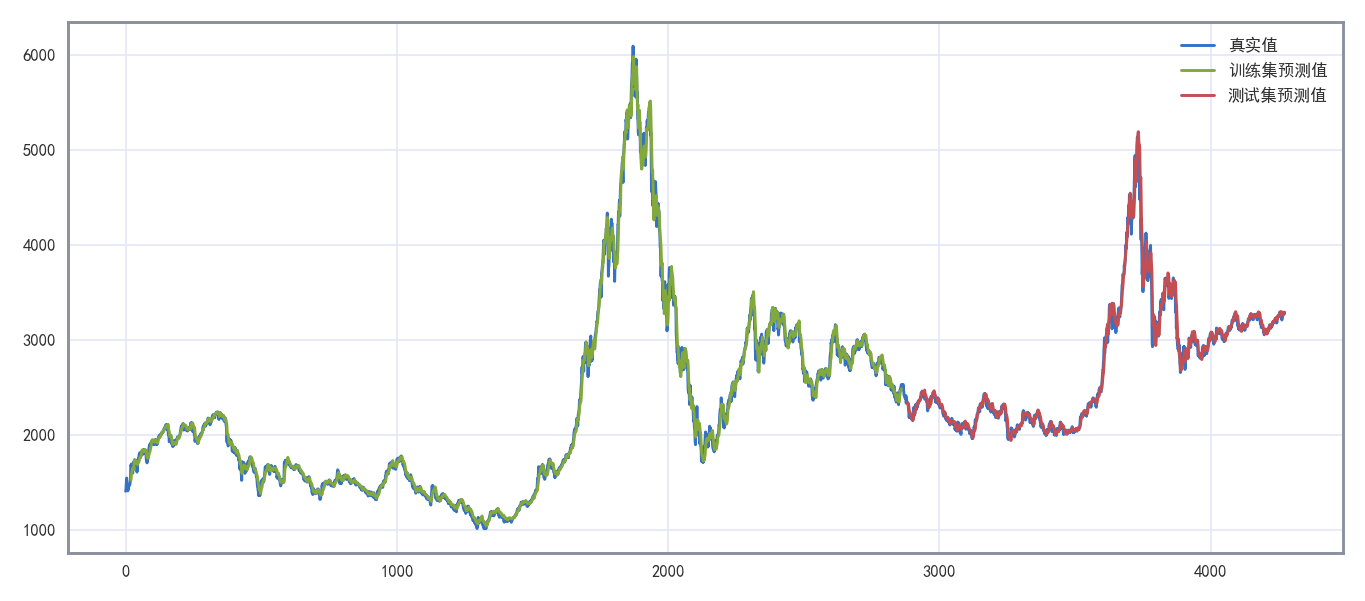

In [18]:
# plot baseline and predictions
plt.figure()
plt.style.use('seaborn-paper')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["真实值",'训练集预测值','测试集预测值'])
plt.show()